In [1]:
import pandas as pd
import numpy as np


In [2]:
# Loading the original datafile for google play
orginal_play = pd.read_csv('googleplaystore.csv')
original_review = pd.read_csv('googleplaystore_user_reviews.csv')

# Making a copy of the file
play = orginal_play.copy()
review = original_review.copy()

In [3]:
review = review.dropna()
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [4]:
#Checking data
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


In [6]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Total rows 10841

### Quality
* Life Made WI-Fi Touchscreen shifted, data needs to be adjusted
* Numeric day of the week is not required, so can be removed for analysis

### Tidiness
* Installs has plus symbol that needs to be removed
* Android ver needs to remove and up
* M removed from size
* Reviews, installs, price need to change to floats(int)
* Last updated changed to datetime
* Change Category to title case
* Remove _ from Category


## Incomplete

* Possibly split up Genres for games with multiple genres
* CC Rivals, Type needs to be changed to Free
* Convert size to KB and then float

Current Version Changes
1.1.2 - Learn To Draw Kawaii Characters
4 - Virtual DJ Sound Mixer
1.1.2 - BT Master	
2.17.8 - Dots puzzle

Group Data into categories i.e. low, med, high
Price
Rating



## Define
The titles of the files have spaces in them, these will need to be changed to add an underscore in place of those spaces

## Code

In [7]:
play = play.rename(columns = {'Content Rating': 'Content_Rating', 'Last Updated': 'Last_Updated', 'Current Ver': 'Current_Ver', 'Android Ver': 'Android_Ver'})

## Test

In [8]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
play['Current_Ver'] = play['Current_Ver'].str.replace('4.0 and up', '1.0.19')
play['Last_Updated'] = play['Last_Updated'].str.replace('1.0.19', 'February 11, 2018')
play['Genres'] = play['Genres'].str.replace('February 11, 2018', 'Lifestyle')
play['Content_Rating'] = play['Content_Rating'].fillna('Everyone')
play['Price'] = play['Price'].str.replace('Everyone', 'Free')
play['Type'] = play['Type'].str.replace('0', 'Free')
play['Installs'] = play['Installs'].str.replace('Free', '1000')
play['Size'] = play['Size'].str.replace('1,000+', '3')
play['Size'] = play['Size'].str.replace('+', '')
play['Reviews'] = play['Reviews'].str.replace('3.0M', '19')
play['Rating'] = play['Rating'].replace(19,1.9)
play['Category'] = play['Category'].str.replace('1.9', 'LIFESTYLE')
play[play['App']== 'Life Made WI-Fi Touchscreen Photo Frame']



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3,1000,Free,Free,Everyone,Lifestyle,"February 11, 2018",1.0.19,NaN


## Define:
Several of the columns have values that are not required. The + sign from Installs, the 'and up' from Android Ver, the 'M' from Size. This section makes those changes

In [10]:
#Removing the Plus sign from installs
play['Installs'] = play['Installs'].map(lambda x: x.rstrip('+')).str.replace(',','')

#Removing the 'and up' from Android Version
play['Android_Ver'] = play['Android_Ver'].str.replace('and up','')

play['Size'] = play['Size'].str.replace('M','')

play['Price'] = play['Price'].str.replace('$','')
play['Price'] = play['Price'].str.replace('Free','0')

play.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Define
Converting datatypes for Reviews, Installs, Price, and Size

## Code

In [11]:
convert_dict = {'Reviews': int, 'Installs': int, 'Price':float}
play = play.astype(convert_dict)
play['Last_Updated'] = pd.to_datetime(play.Last_Updated)
play['Month'] = play['Last_Updated'].dt.strftime('%m')
play['Year'] = play['Last_Updated'].dt.strftime('%y')
play['Last_Updated'] = play['Last_Updated'].dt.strftime('%m/%y')


In [12]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,01/18,1.0.0,4.0.3,01,18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,01/18,2.0.0,4.0.3,01,18
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,08/18,1.2.4,4.0.3,08,18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,06/18,Varies with device,4.2,06,18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,06/18,1.1,4.4,06,18
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,03/17,1.0,2.3,03,17
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,04/18,1.1,4.0.3,04,18
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,06/18,6.1.61.1,4.2,06,18
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,09/17,2.9.2,3.0,09,17
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,07/18,2.8,4.0.3,07,18


## Test


In [13]:
play.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
Month              object
Year               object
dtype: object

## Define
The titles in categories needs to be changed to title case, the _ also needs to be removed

## CODE

In [14]:
play['Category'] = play['Category'].str.title()
play['Category'] = play['Category'].str.replace('And','and')
play['Category'] = play['Category'].str.replace('_' , ' ')
play['App'] = play['App'].str.title()


In [15]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art and Design,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,01/18,1.0.0,4.0.3,01,18
1,Coloring Book Moana,Art and Design,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,01/18,2.0.0,4.0.3,01,18
2,"U Launcher Lite – Free Live Cool Themes, Hide ...",Art and Design,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,08/18,1.2.4,4.0.3,08,18
3,Sketch - Draw & Paint,Art and Design,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,06/18,Varies with device,4.2,06,18
4,Pixel Draw - Number Art Coloring Book,Art and Design,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,06/18,1.1,4.4,06,18


In [16]:
play = play.drop(['Current_Ver', 'Android_Ver'], axis=1)

In [17]:
export = play.to_csv('play_clean.csv', index=None, header=True)

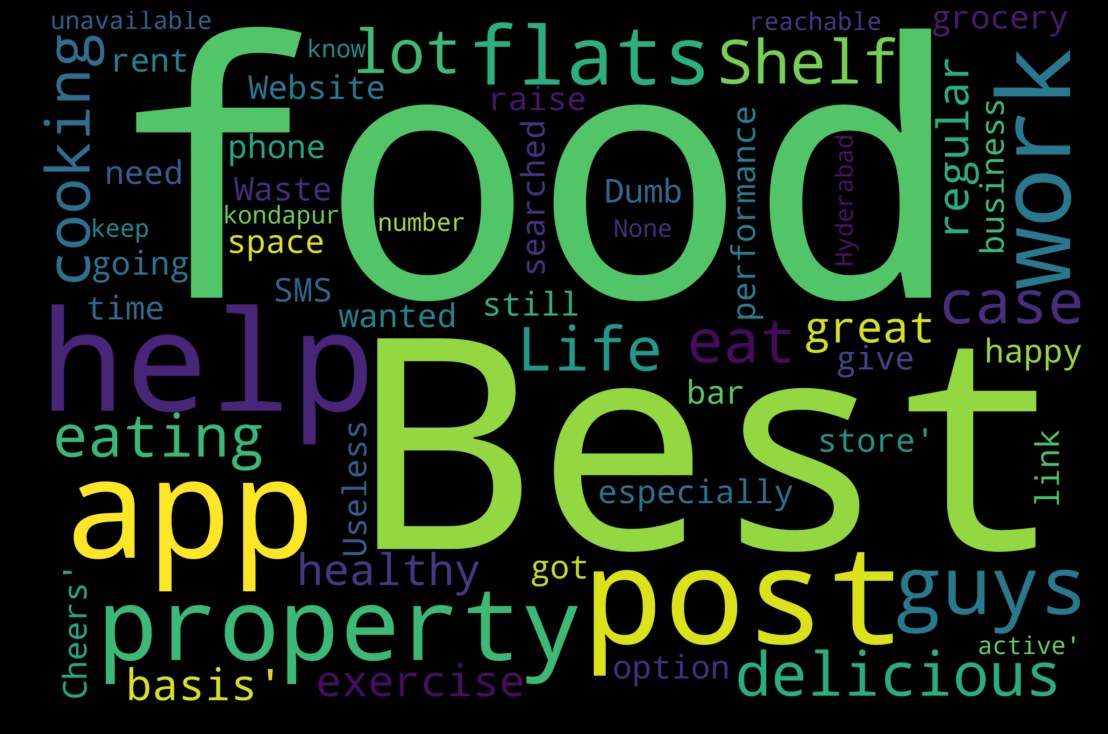

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()